# $\color{red}{\text{Farbod Siahkali - 810198510}}$

# $\color{green}{\text{Answers to Questions}}$

1) The Adam optimizer is an adaptive optimization algorithm commonly used in deep learning. It combines elements of both the adaptive gradient algorithm (AdaGrad) and the root mean square propagation (RMSProp) algorithm. The working mechanism of the Adam optimizer can be summarized as follows:

1. Initialization: The optimizer initializes the first and second moment variables, which are vectors of the same shape as the model's parameters. These variables are initially set to zero.

2. Computing gradients: The optimizer computes the gradients of the model's parameters with respect to the loss function using backpropagation.

3. Updating first and second moments: The optimizer updates the first moment variable (the exponentially decaying average of past gradients) and the second moment variable (the exponentially decaying average of past squared gradients) based on the current gradients. This step introduces adaptive learning rates for each parameter.

4. Bias correction: The optimizer applies bias correction to the first and second moments to account for their initialization at zero. This step ensures that the moments are accurate, especially during the initial training iterations.

5. Parameter update: The optimizer updates the model's parameters using the first and second moments. It scales the gradients by the adaptive learning rates computed from the second moment, resulting in faster convergence and better stability.

The main differences between the Adam optimizer and the stochastic gradient descent (SGD) optimizer are:

1. Adaptive learning rate: Adam adapts the learning rate for each parameter based on the past gradients, whereas SGD uses a fixed learning rate throughout training.

2. Moment variables: Adam maintains two moment variables (first and second moments) to estimate the adaptive learning rates, while SGD does not have these moment variables.

3. Learning rate decay: Adam automatically adjusts the learning rate during training, typically by decreasing it over time. SGD often requires manual tuning of the learning rate schedule.

4. Convergence speed: Adam usually converges faster than SGD due to its adaptive learning rates. It can handle a wider range of learning rate values without extensive tuning.

5. Robustness to sparse gradients: Adam performs better than SGD when dealing with sparse gradients or noisy data since it maintains adaptive learning rates for each parameter.

Overall, Adam combines the benefits of adaptive learning rates and momentum techniques to improve convergence speed and robustness compared to SGD. However, the choice between Adam and SGD depends on the specific problem, dataset, and other factors, and it is recommended to experiment with both optimizers to find the best performance for a given task.

# $\color{green}{\text{Project Overview}}$

This project aimed to investigate the impact of different model architectures and techniques on the performance of a convolutional neural network (CNN) trained on the CIFAR-10 dataset. The initial model without dropout and batch normalization exhibited signs of overfitting. To address this issue, the dataset was manipulated by creating an imbalanced version where the first two classes (airplane and automobile) were overrepresented. Additionally, data augmentation techniques, including random flips, rotations, resized crops, and color jittering, were applied to rebalance the imbalanced dataset. Furthermore, dropout and batch normalization were incorporated into the model to improve its performance and alleviate overfitting. The outcomes of these modifications were evaluated using precision, recall, F1 score, and accuracy metrics.

1. Introduction:
The CIFAR-10 dataset is a widely-used benchmark in the field of computer vision, consisting of 60,000 images categorized into ten classes. The objective of this project was to build and refine a CNN model for accurate classification of the CIFAR-10 dataset, particularly focusing on the airplane and automobile classes.

2. Model Architecture:
The initial CNN architecture comprised four convolutional layers, two max-pooling layers, and two fully connected layers. However, this architecture exhibited overfitting on the CIFAR-10 dataset.

3. Addressing Overfitting:
To investigate the impact of imbalanced data, the CIFAR-10 dataset was modified by over-representing the airplane and automobile classes. This imbalanced dataset was used to train the model, revealing limitations in classifying these specific classes.

4. Data Augmentation:
To mitigate the effects of the imbalanced dataset, various data augmentation techniques were employed, including random horizontal and vertical flips, rotations, resized crops, and color jittering. The augmentation process aimed to create additional samples for the airplane and automobile classes, thus rebalancing the dataset.

5. Incorporating Dropout and Batch Normalization:
To further improve the model's performance and address overfitting, dropout and batch normalization layers were added to the CNN architecture. Dropout helps prevent overfitting by randomly disabling neurons during training, while batch normalization improves the stability and speed of training by normalizing the input to each layer.

6. Evaluation:
The modified CNN model with dropout, batch normalization, and augmented data achieved improved performance compared to the initial model. The addition of dropout and batch normalization reduced overfitting, resulting in improved accuracy, precision, recall, and F1 score. The augmented data, generated through various transformations, helped rebalance the imbalanced dataset and enhance the model's ability to classify the airplane and automobile classes.

7. Conclusion:
Through the incorporation of dropout, batch normalization, and data augmentation techniques, the performance of the CNN model on the CIFAR-10 dataset significantly improved. The addition of dropout and batch normalization effectively addressed overfitting, leading to better generalization. Moreover, data augmentation helped rebalance the imbalanced dataset, resulting in improved classification performance for the airplane and automobile classes. These findings highlight the importance of regularization techniques and data augmentation in enhancing the performance of CNN models for image classification tasks.

# $\color{green}{\text{Part 0: Data Loading and Preprocessing}}$


In [ ]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize images
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

# Display one image from each class
classes = train_dataset.classes
class_images = [[] for _ in range(len(classes))]

for image, label in train_dataset:
    class_images[label].append(image)


100%|██████████| 170498071/170498071 [00:06<00:00, 28127693.95it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


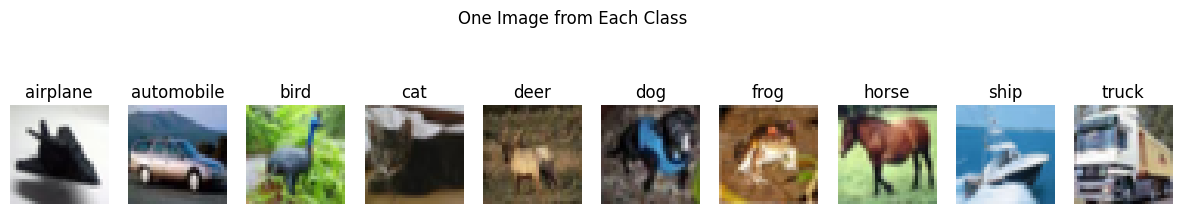

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(15, 3))
fig.suptitle('One Image from Each Class')

for i in range(10):
    axs[i].imshow(class_images[i][0])
    axs[i].set_title(classes[i])
    axs[i].axis('off')

plt.show()

In [ ]:
# Display the number of data for each class in the train and test sets
train_data_counts = [0] * len(classes)
test_data_counts = [0] * len(classes)

for _, label in train_dataset:
    train_data_counts[label] += 1

for _, label in test_dataset:
    test_data_counts[label] += 1

print('Train Data Counts:')
for i in range(len(classes)):
    print(f'{classes[i]}: {train_data_counts[i]}')

print('\nTest Data Counts:')
for i in range(len(classes)):
    print(f'{classes[i]}: {test_data_counts[i]}')

Train Data Counts:
airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000

Test Data Counts:
airplane: 1000
automobile: 1000
bird: 1000
cat: 1000
deer: 1000
dog: 1000
frog: 1000
horse: 1000
ship: 1000
truck: 1000


In [ ]:
train_labels = torch.tensor(train_dataset.targets)
test_labels = torch.tensor(test_dataset.targets)

train_labels_onehot = torch.nn.functional.one_hot(train_labels, num_classes=len(classes)).float()
test_labels_onehot = torch.nn.functional.one_hot(test_labels, num_classes=len(classes)).float()

print(train_labels[0])
print(train_labels_onehot[0])

tensor(6)
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])


# $\color{green}{\text{Part 1: Training on Cifar-10 Dataset}}$


In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
torch.cuda.is_available()

Files already downloaded and verified
Files already downloaded and verified


True

In [ ]:
# Define the Convolutional model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()

        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, len(classes))

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.pool1(self.relu2(self.conv2(x)))

        x = self.relu3(self.conv3(x))
        x = self.pool2(self.relu4(self.conv4(x)))

        x = x.view(-1, 64 * 8 * 8)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
# Initialize the model, optimizer, and loss function
model = CNN().to('cuda')
optimizer = optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss().to('cuda')

# Prepare the data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training loop
epochs = 15
loss_values = []
loss_values_test = []

accuracy_values = []
accuracy_values_test = []

precision_values_test = []
recall_values_test = []
f1_values_test = []

for epoch in range(epochs):
    running_loss = 0.0
    total_predictions = []
    true_labels = []
    
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        _, predicted = torch.max(outputs.data, 1)
        total_predictions.extend(predicted.to('cpu'))
        true_labels.extend(labels.to('cpu'))
        
        running_loss += loss.item()
    
    # Calculate metrics for the training data
    precision_train = precision_score(true_labels, total_predictions, average='macro')
    recall_train = recall_score(true_labels, total_predictions, average='macro')
    f1_train = f1_score(true_labels, total_predictions, average='macro')
    accuracy_train = accuracy_score(true_labels, total_predictions)
    
    loss_values.append(running_loss / len(train_loader))
    accuracy_values.append(accuracy_train)
    
    # Evaluation on test data
    model.eval()
    running_loss_test = 0.0
    total_predictions = []
    true_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')

            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            running_loss_test += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_predictions.extend(predicted.to('cpu'))
            true_labels.extend(labels.to('cpu'))
    
    # Calculate metrics for the test data
    precision_test = precision_score(true_labels, total_predictions, average='macro')
    recall_test = recall_score(true_labels, total_predictions, average='macro')
    f1_test = f1_score(true_labels, total_predictions, average='macro')
    accuracy_test = accuracy_score(true_labels, total_predictions)

    precision_values_test.append(precision_test)
    recall_values_test.append(recall_test)
    f1_values_test.append(f1_test)
    accuracy_values_test.append(accuracy_test)
    loss_values_test.append(running_loss_test / len(test_loader))
    
    # Print metrics for the current epoch
    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'Training - Loss: {running_loss / len(train_loader):.4f}, '
          f'Accuracy: {accuracy_train:.4f}, '
          f'Precision: {precision_train:.4f}, '
          f'Recall: {recall_train:.4f}, '
          f'F1-Score: {f1_train:.4f}')
    
    print(f'Test - Loss: {running_loss_test / len(test_loader):.4f}, '
          f'Accuracy: {accuracy_test:.4f}, '
          f'Precision: {precision_test:.4f}, '
          f'Recall: {recall_test:.4f}, '
          f'F1-Score: {f1_test:.4f}\n')

Epoch 1/15:
Training - Loss: 1.4390, Accuracy: 0.4761, Precision: 0.4711, Recall: 0.4761, F1-Score: 0.4721
Test - Loss: 1.1229, Accuracy: 0.6023, Precision: 0.5953, Recall: 0.6023, F1-Score: 0.5917

Epoch 2/15:
Training - Loss: 0.9762, Accuracy: 0.6533, Precision: 0.6507, Recall: 0.6533, F1-Score: 0.6518
Test - Loss: 0.9789, Accuracy: 0.6621, Precision: 0.6791, Recall: 0.6621, F1-Score: 0.6521

Epoch 3/15:
Training - Loss: 0.7785, Accuracy: 0.7271, Precision: 0.7255, Recall: 0.7271, F1-Score: 0.7262
Test - Loss: 0.8026, Accuracy: 0.7193, Precision: 0.7257, Recall: 0.7193, F1-Score: 0.7212

Epoch 4/15:
Training - Loss: 0.6537, Accuracy: 0.7692, Precision: 0.7684, Recall: 0.7692, F1-Score: 0.7688
Test - Loss: 0.7837, Accuracy: 0.7368, Precision: 0.7433, Recall: 0.7368, F1-Score: 0.7306

Epoch 5/15:
Training - Loss: 0.5462, Accuracy: 0.8075, Precision: 0.8068, Recall: 0.8075, F1-Score: 0.8071
Test - Loss: 0.8154, Accuracy: 0.7328, Precision: 0.7418, Recall: 0.7328, F1-Score: 0.7329

Epoch

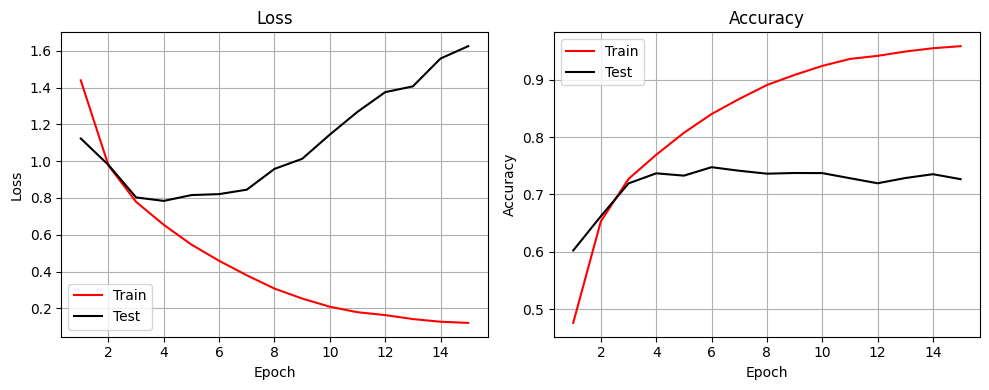

In [ ]:
# Plot loss and accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, epochs+1), loss_values, label='Train', c='r')
plt.plot(range(1, epochs+1), loss_values_test, label='Test', c='k')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracy_values, label='Train', c='r')
plt.plot(range(1, epochs+1), accuracy_values_test, label='Test', c='k')
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.tight_layout()
plt.show()

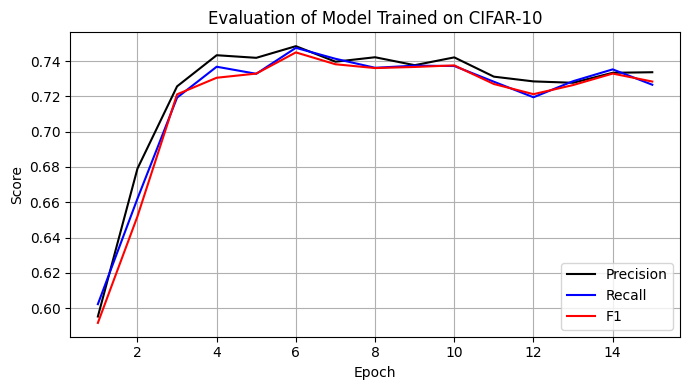

In [ ]:
# Plot loss and accuracy values
plt.figure(figsize=(7, 4))
plt.grid()
plt.plot(range(1, epochs+1), precision_values_test, label='Precision', c='k')
plt.plot(range(1, epochs+1), recall_values_test, label='Recall', c='b')
plt.plot(range(1, epochs+1), f1_values_test, label='F1', c='r')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Evaluation of Model Trained on CIFAR-10')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Calculate classification report for the imbalanced model
report = classification_report(true_labels, total_predictions, target_names=classes)

# Print classification report
print("Classification Report of Model Trained on CIFAR-10:\n")
print(report)


Classification Report of Model Trained on CIFAR-10:

              precision    recall  f1-score   support

    airplane       0.77      0.73      0.75      1000
  automobile       0.83      0.85      0.84      1000
        bird       0.61      0.61      0.61      1000
         cat       0.53      0.57      0.55      1000
        deer       0.70      0.63      0.66      1000
         dog       0.59      0.70      0.64      1000
        frog       0.75      0.82      0.78      1000
       horse       0.83      0.75      0.79      1000
        ship       0.85      0.85      0.85      1000
       truck       0.88      0.75      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



# $\color{green}{\text{Part 2: Training on Imbalanced Dataset}}$


In [ ]:
import random

# Create imbalanced dataset by removing 80% of data from classes 1 (airplane) and 2 (car)
imbalanced_train_data = []
imbalanced_train_labels = []

for i, (data, label) in enumerate(train_dataset):
    if label != 0 and label != 1:
        imbalanced_train_data.append(data)
        imbalanced_train_labels.append(label)
    elif label == 0 and random.random() < 0.2:
        imbalanced_train_data.append(data)
        imbalanced_train_labels.append(label)
    elif label == 1 and random.random() < 0.2:
        imbalanced_train_data.append(data)
        imbalanced_train_labels.append(label)

# Convert the imbalanced dataset to tensors
imbalanced_train_data = torch.stack(imbalanced_train_data)
imbalanced_train_labels = torch.tensor(imbalanced_train_labels)

# Create a new train dataset using the imbalanced data
imbalanced_train_dataset = torch.utils.data.TensorDataset(imbalanced_train_data, imbalanced_train_labels)

In [ ]:
# Display the number of data for each class in the train and test sets
test_data_counts = [0] * len(classes)

for _, label in imbalanced_train_dataset:
    test_data_counts[label] += 1

print('\nTest Data Counts:')
for i in range(len(classes)):
    print(f'{classes[i]}: {test_data_counts[i]}')


Test Data Counts:
airplane: 1030
automobile: 1018
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [ ]:
# Initialize the im_model, optimizer, and loss function
im_model = CNN().to('cuda')
optimizer = optim.Adam(im_model.parameters())
loss_function = nn.CrossEntropyLoss().to('cuda')

# Prepare the data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(imbalanced_train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training loop
loss_values = []
loss_values_test = []

accuracy_values = []
accuracy_values_test = []

precision_values_test = []
recall_values_test = []
f1_values_test = []

for epoch in range(epochs):
    running_loss = 0.0
    total_predictions = []
    true_labels = []
    
    im_model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = im_model(inputs)
        loss = loss_function(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        _, predicted = torch.max(outputs.data, 1)
        total_predictions.extend(predicted.to('cpu'))
        true_labels.extend(labels.to('cpu'))
        
        running_loss += loss.item()
    
    # Calculate metrics for the training data
    precision_train = precision_score(true_labels, total_predictions, average='macro')
    recall_train = recall_score(true_labels, total_predictions, average='macro')
    f1_train = f1_score(true_labels, total_predictions, average='macro')
    accuracy_train = accuracy_score(true_labels, total_predictions)
    
    loss_values.append(running_loss / len(train_loader))
    accuracy_values.append(accuracy_train)
    
    # Evaluation on test data
    im_model.eval()
    running_loss_test = 0.0
    total_predictions = []
    true_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')

            outputs = im_model(inputs)
            loss = loss_function(outputs, labels)
            running_loss_test += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_predictions.extend(predicted.to('cpu'))
            true_labels.extend(labels.to('cpu'))
    
    # Calculate metrics for the test data
    precision_test = precision_score(true_labels, total_predictions, average='macro')
    recall_test = recall_score(true_labels, total_predictions, average='macro')
    f1_test = f1_score(true_labels, total_predictions, average='macro')
    accuracy_test = accuracy_score(true_labels, total_predictions)

    precision_values_test.append(precision_test)
    recall_values_test.append(recall_test)
    f1_values_test.append(f1_test)
    accuracy_values_test.append(accuracy_test)
    loss_values_test.append(running_loss_test / len(test_loader))
    
    # Print metrics for the current epoch
    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'Training - Loss: {running_loss / len(train_loader):.4f}, '
          f'Accuracy: {accuracy_train:.4f}, '
          f'Precision: {precision_train:.4f}, '
          f'Recall: {recall_train:.4f}, '
          f'F1-Score: {f1_train:.4f}')
    
    print(f'Test - Loss: {running_loss_test / len(test_loader):.4f}, '
          f'Accuracy: {accuracy_test:.4f}, '
          f'Precision: {precision_test:.4f}, '
          f'Recall: {recall_test:.4f}, '
          f'F1-Score: {f1_test:.4f}\n')

Epoch 1/15:
Training - Loss: 1.3995, Accuracy: 0.4937, Precision: 0.4775, Recall: 0.4385, F1-Score: 0.4408
Test - Loss: 1.2904, Accuracy: 0.5342, Precision: 0.6111, Recall: 0.5342, F1-Score: 0.5047

Epoch 2/15:
Training - Loss: 0.9781, Accuracy: 0.6540, Precision: 0.6410, Recall: 0.6128, F1-Score: 0.6225
Test - Loss: 1.0278, Accuracy: 0.6462, Precision: 0.6741, Recall: 0.6462, F1-Score: 0.6378

Epoch 3/15:
Training - Loss: 0.7822, Accuracy: 0.7252, Precision: 0.7165, Recall: 0.6993, F1-Score: 0.7065
Test - Loss: 0.8922, Accuracy: 0.6911, Precision: 0.7131, Recall: 0.6911, F1-Score: 0.6902

Epoch 4/15:
Training - Loss: 0.6452, Accuracy: 0.7751, Precision: 0.7702, Recall: 0.7575, F1-Score: 0.7631
Test - Loss: 0.8489, Accuracy: 0.7122, Precision: 0.7258, Recall: 0.7122, F1-Score: 0.7095

Epoch 5/15:
Training - Loss: 0.5358, Accuracy: 0.8092, Precision: 0.8060, Recall: 0.7956, F1-Score: 0.8003
Test - Loss: 0.9279, Accuracy: 0.6993, Precision: 0.7258, Recall: 0.6993, F1-Score: 0.6956

Epoch

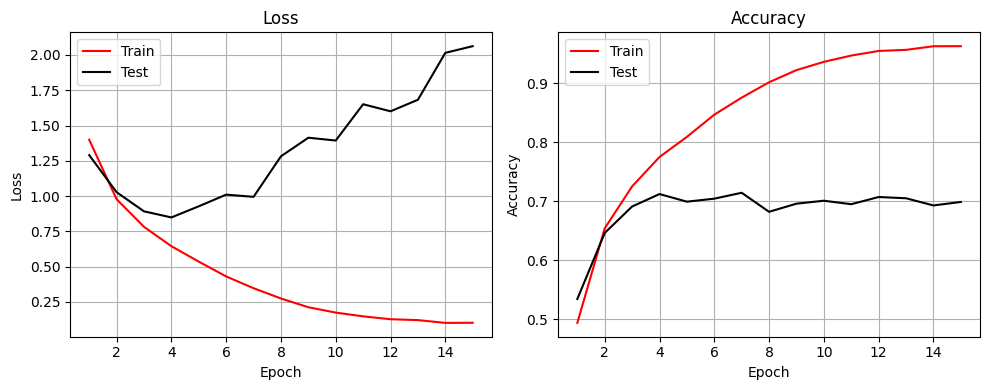

In [ ]:
# Plot loss and accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, epochs+1), loss_values, label='Train', c='r')
plt.plot(range(1, epochs+1), loss_values_test, label='Test', c='k')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracy_values, label='Train', c='r')
plt.plot(range(1, epochs+1), accuracy_values_test, label='Test', c='k')
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.tight_layout()
plt.show()

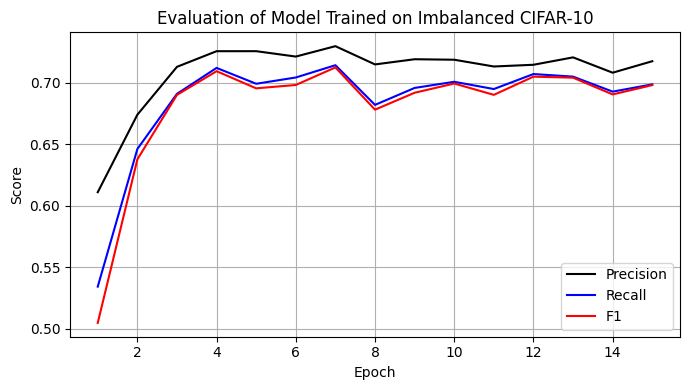

In [ ]:
# Plot loss and accuracy values
plt.figure(figsize=(7, 4))
plt.grid()
plt.plot(range(1, epochs+1), precision_values_test, label='Precision', c='k')
plt.plot(range(1, epochs+1), recall_values_test, label='Recall', c='b')
plt.plot(range(1, epochs+1), f1_values_test, label='F1', c='r')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Evaluation of Model Trained on Imbalanced CIFAR-10')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate classification report for the imbalanced model
report = classification_report(true_labels, total_predictions, target_names=classes)

# Print classification report
print("Classification Report of Model Trained on Imbalanced CIFAR-10:\n")
print(report)


Classification Report of Model Trained on Imbalanced CIFAR-10:

              precision    recall  f1-score   support

    airplane       0.84      0.46      0.59      1000
  automobile       0.90      0.69      0.78      1000
        bird       0.59      0.65      0.62      1000
         cat       0.49      0.61      0.54      1000
        deer       0.69      0.66      0.68      1000
         dog       0.63      0.65      0.64      1000
        frog       0.82      0.74      0.78      1000
       horse       0.79      0.78      0.78      1000
        ship       0.72      0.88      0.79      1000
       truck       0.70      0.88      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000



# $\color{green}{\text{Part 3: Training on Re-balanced Dataset}}$


In [ ]:
from torchvision import transforms

# Define data augmentation transformations
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])

# Create augmented dataset for airplane and car classes
augmented_train_data = []
augmented_train_labels = []

for i, (data, label) in enumerate(imbalanced_train_dataset):
    if label == 0 or label == 1:
        for _ in range(4):  # Create 4 augmented samples for each class
            augmented_data = augmentation_transforms(data)
            augmented_train_data.append(augmented_data)
            augmented_train_labels.append(label)

# Convert the augmented dataset to tensors
augmented_train_data = torch.stack(augmented_train_data)
augmented_train_labels = torch.tensor(augmented_train_labels)

# Create a new balanced train dataset using the augmented data
balanced_train_data = torch.cat([imbalanced_train_data, augmented_train_data])
balanced_train_labels = torch.cat([imbalanced_train_labels, augmented_train_labels])

balanced_train_dataset = torch.utils.data.TensorDataset(balanced_train_data, balanced_train_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
# Display the number of data for each class in the train and test sets
train_data_counts = [0] * len(classes)

for label in balanced_train_labels:
    train_data_counts[label] += 1

print('Augmented Train Data Counts:')
for i in range(len(classes)):
    print(f'{classes[i]}: {train_data_counts[i]}')


Augmented Train Data Counts:
airplane: 5150
automobile: 5090
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [ ]:
# Initialize the rebalanced_model, optimizer, and loss function
rebalanced_model = CNN().to('cuda')
optimizer = optim.Adam(rebalanced_model.parameters())
loss_function = nn.CrossEntropyLoss().to('cuda')

# Prepare the data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(balanced_train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training loop
loss_values = []
loss_values_test = []

accuracy_values = []
accuracy_values_test = []

precision_values_test = []
recall_values_test = []
f1_values_test = []

for epoch in range(epochs):
    running_loss = 0.0
    total_predictions = []
    true_labels = []
    
    rebalanced_model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = rebalanced_model(inputs)
        loss = loss_function(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        _, predicted = torch.max(outputs.data, 1)
        total_predictions.extend(predicted.to('cpu'))
        true_labels.extend(labels.to('cpu'))
        
        running_loss += loss.item()
    
    # Calculate metrics for the training data
    precision_train = precision_score(true_labels, total_predictions, average='macro')
    recall_train = recall_score(true_labels, total_predictions, average='macro')
    f1_train = f1_score(true_labels, total_predictions, average='macro')
    accuracy_train = accuracy_score(true_labels, total_predictions)
    
    loss_values.append(running_loss / len(train_loader))
    accuracy_values.append(accuracy_train)
    
    # Evaluation on test data
    rebalanced_model.eval()
    running_loss_test = 0.0
    total_predictions = []
    true_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')

            outputs = rebalanced_model(inputs)
            loss = loss_function(outputs, labels)
            running_loss_test += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_predictions.extend(predicted.to('cpu'))
            true_labels.extend(labels.to('cpu'))
    
    # Calculate metrics for the test data
    precision_test = precision_score(true_labels, total_predictions, average='macro')
    recall_test = recall_score(true_labels, total_predictions, average='macro')
    f1_test = f1_score(true_labels, total_predictions, average='macro')
    accuracy_test = accuracy_score(true_labels, total_predictions)

    precision_values_test.append(precision_test)
    recall_values_test.append(recall_test)
    f1_values_test.append(f1_test)
    accuracy_values_test.append(accuracy_test)
    loss_values_test.append(running_loss_test / len(test_loader))
    
    # Print metrics for the current epoch
    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'Training - Loss: {running_loss / len(train_loader):.4f}, '
          f'Accuracy: {accuracy_train:.4f}, '
          f'Precision: {precision_train:.4f}, '
          f'Recall: {recall_train:.4f}, '
          f'F1-Score: {f1_train:.4f}')
    
    print(f'Test - Loss: {running_loss_test / len(test_loader):.4f}, '
          f'Accuracy: {accuracy_test:.4f}, '
          f'Precision: {precision_test:.4f}, '
          f'Recall: {recall_test:.4f}, '
          f'F1-Score: {f1_test:.4f}\n')

Epoch 1/15:
Training - Loss: 1.2610, Accuracy: 0.5319, Precision: 0.5268, Recall: 0.5315, F1-Score: 0.5265
Test - Loss: 1.2189, Accuracy: 0.5609, Precision: 0.6063, Recall: 0.5609, F1-Score: 0.5498

Epoch 2/15:
Training - Loss: 0.8755, Accuracy: 0.6834, Precision: 0.6807, Recall: 0.6832, F1-Score: 0.6813
Test - Loss: 0.9575, Accuracy: 0.6598, Precision: 0.6800, Recall: 0.6598, F1-Score: 0.6582

Epoch 3/15:
Training - Loss: 0.7038, Accuracy: 0.7467, Precision: 0.7452, Recall: 0.7465, F1-Score: 0.7456
Test - Loss: 0.9927, Accuracy: 0.6557, Precision: 0.6990, Recall: 0.6557, F1-Score: 0.6549

Epoch 4/15:
Training - Loss: 0.5828, Accuracy: 0.7921, Precision: 0.7911, Recall: 0.7919, F1-Score: 0.7914
Test - Loss: 0.9259, Accuracy: 0.6913, Precision: 0.7173, Recall: 0.6913, F1-Score: 0.6909

Epoch 5/15:
Training - Loss: 0.4840, Accuracy: 0.8265, Precision: 0.8258, Recall: 0.8263, F1-Score: 0.8260
Test - Loss: 1.0317, Accuracy: 0.6835, Precision: 0.7049, Recall: 0.6835, F1-Score: 0.6760

Epoch

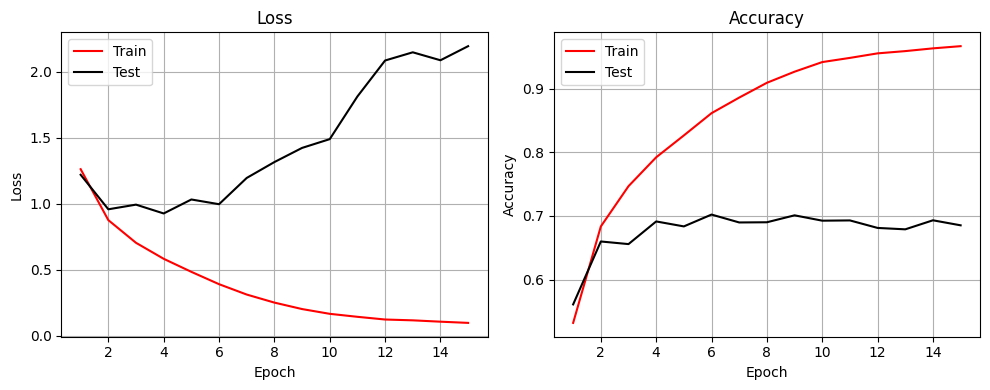

In [ ]:
# Plot loss and accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, epochs+1), loss_values, label='Train', c='r')
plt.plot(range(1, epochs+1), loss_values_test, label='Test', c='k')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracy_values, label='Train', c='r')
plt.plot(range(1, epochs+1), accuracy_values_test, label='Test', c='k')
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.tight_layout()
plt.show()

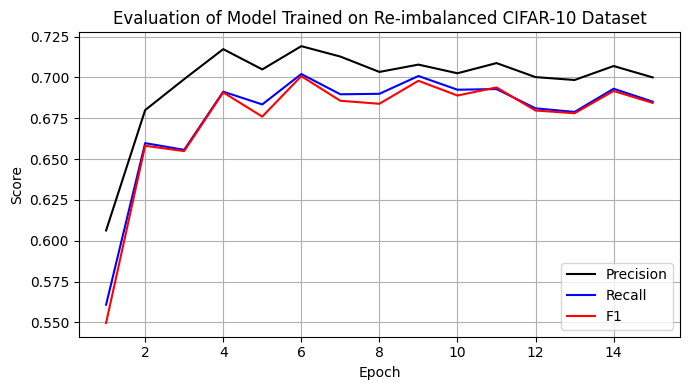

In [ ]:
# Plot loss and accuracy values
plt.figure(figsize=(7, 4))
plt.grid()
plt.plot(range(1, epochs+1), precision_values_test, label='Precision', c='k')
plt.plot(range(1, epochs+1), recall_values_test, label='Recall', c='b')
plt.plot(range(1, epochs+1), f1_values_test, label='F1', c='r')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Evaluation of Model Trained on Re-imbalanced CIFAR-10 Dataset')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate classification report for the rebalanced model
report = classification_report(true_labels, total_predictions, target_names=classes)

# Print classification report
print("Classification Report of Model Trained on Re-imbalanced CIFAR-10 Dataset:\n")
print(report)


Classification Report of Model Trained on Re-imbalanced CIFAR-10 Dataset:

              precision    recall  f1-score   support

    airplane       0.81      0.49      0.61      1000
  automobile       0.88      0.67      0.76      1000
        bird       0.61      0.58      0.60      1000
         cat       0.51      0.51      0.51      1000
        deer       0.64      0.69      0.66      1000
         dog       0.53      0.73      0.62      1000
        frog       0.79      0.73      0.76      1000
       horse       0.77      0.77      0.77      1000
        ship       0.74      0.84      0.79      1000
       truck       0.71      0.84      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000



# $\color{green}{\text{Part 4: Training with Dropout and Batch Normalization}}$


In [ ]:
import torch.nn as nn

class CNNWithDropoutAndBatchNorm(nn.Module):
    def __init__(self):
        super(CNNWithDropoutAndBatchNorm, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(0.25)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout2 = nn.Dropout(0.25)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.dropout3 = nn.Dropout(0.25)
        
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.batchnorm4 = nn.BatchNorm1d(512)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.dropout1(x)
        
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.dropout2(x)
        
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        x = self.dropout3(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.batchnorm4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        
        x = self.fc2(x)
        
        return x


In [ ]:
# Create an instance of the modified CNN model_with_dp_bn
model_with_dp_bn = CNNWithDropoutAndBatchNorm().to('cuda')
optimizer = optim.Adam(model_with_dp_bn.parameters())
loss_function = nn.CrossEntropyLoss().to('cuda')

# Prepare the data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training loop
loss_values = []
loss_values_test = []

accuracy_values = []
accuracy_values_test = []

precision_values_test = []
recall_values_test = []
f1_values_test = []

for epoch in range(epochs):
    running_loss = 0.0
    total_predictions = []
    true_labels = []
    
    model_with_dp_bn.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model_with_dp_bn(inputs)
        loss = loss_function(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        _, predicted = torch.max(outputs.data, 1)
        total_predictions.extend(predicted.to('cpu'))
        true_labels.extend(labels.to('cpu'))
        
        running_loss += loss.item()
    
    # Calculate metrics for the training data
    precision_train = precision_score(true_labels, total_predictions, average='macro')
    recall_train = recall_score(true_labels, total_predictions, average='macro')
    f1_train = f1_score(true_labels, total_predictions, average='macro')
    accuracy_train = accuracy_score(true_labels, total_predictions)
    
    loss_values.append(running_loss / len(train_loader))
    accuracy_values.append(accuracy_train)
    
    # Evaluation on test data
    model_with_dp_bn.eval()
    running_loss_test = 0.0
    total_predictions = []
    true_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')

            outputs = model_with_dp_bn(inputs)
            loss = loss_function(outputs, labels)
            running_loss_test += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_predictions.extend(predicted.to('cpu'))
            true_labels.extend(labels.to('cpu'))
    
    # Calculate metrics for the test data
    precision_test = precision_score(true_labels, total_predictions, average='macro')
    recall_test = recall_score(true_labels, total_predictions, average='macro')
    f1_test = f1_score(true_labels, total_predictions, average='macro')
    accuracy_test = accuracy_score(true_labels, total_predictions)

    precision_values_test.append(precision_test)
    recall_values_test.append(recall_test)
    f1_values_test.append(f1_test)
    accuracy_values_test.append(accuracy_test)
    loss_values_test.append(running_loss_test / len(test_loader))
    
    # Print metrics for the current epoch
    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'Training - Loss: {running_loss / len(train_loader):.4f}, '
          f'Accuracy: {accuracy_train:.4f}, '
          f'Precision: {precision_train:.4f}, '
          f'Recall: {recall_train:.4f}, '
          f'F1-Score: {f1_train:.4f}')
    
    print(f'Test - Loss: {running_loss_test / len(test_loader):.4f}, '
          f'Accuracy: {accuracy_test:.4f}, '
          f'Precision: {precision_test:.4f}, '
          f'Recall: {recall_test:.4f}, '
          f'F1-Score: {f1_test:.4f}\n')

Epoch 1/15:
Training - Loss: 1.3306, Accuracy: 0.5256, Precision: 0.5209, Recall: 0.5256, F1-Score: 0.5227
Test - Loss: 0.9655, Accuracy: 0.6565, Precision: 0.6739, Recall: 0.6565, F1-Score: 0.6558

Epoch 2/15:
Training - Loss: 1.0391, Accuracy: 0.6311, Precision: 0.6275, Recall: 0.6311, F1-Score: 0.6290
Test - Loss: 0.8512, Accuracy: 0.7021, Precision: 0.7177, Recall: 0.7021, F1-Score: 0.6996

Epoch 3/15:
Training - Loss: 0.9266, Accuracy: 0.6734, Precision: 0.6706, Recall: 0.6734, F1-Score: 0.6718
Test - Loss: 0.7660, Accuracy: 0.7309, Precision: 0.7398, Recall: 0.7309, F1-Score: 0.7273

Epoch 4/15:
Training - Loss: 0.8627, Accuracy: 0.6956, Precision: 0.6933, Recall: 0.6956, F1-Score: 0.6943
Test - Loss: 0.7608, Accuracy: 0.7309, Precision: 0.7488, Recall: 0.7309, F1-Score: 0.7276

Epoch 5/15:
Training - Loss: 0.8037, Accuracy: 0.7165, Precision: 0.7142, Recall: 0.7165, F1-Score: 0.7152
Test - Loss: 0.6906, Accuracy: 0.7581, Precision: 0.7656, Recall: 0.7581, F1-Score: 0.7568

Epoch

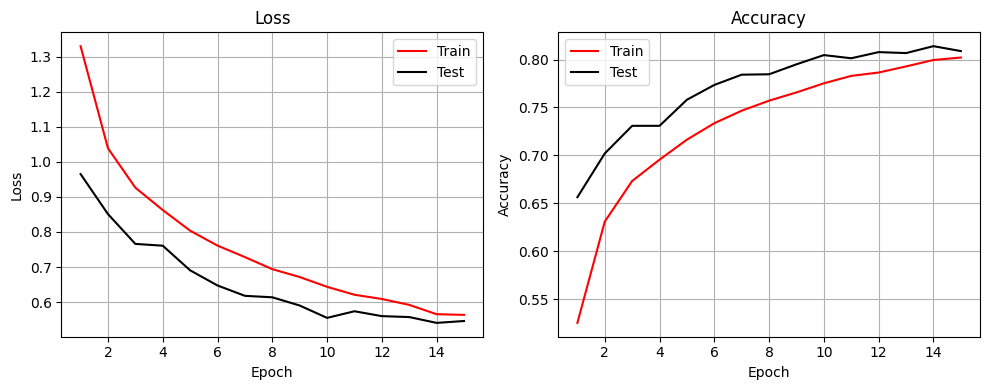

In [ ]:
# Plot loss and accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, epochs+1), loss_values, label='Train', c='r')
plt.plot(range(1, epochs+1), loss_values_test, label='Test', c='k')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracy_values, label='Train', c='r')
plt.plot(range(1, epochs+1), accuracy_values_test, label='Test', c='k')
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.tight_layout()
plt.show()

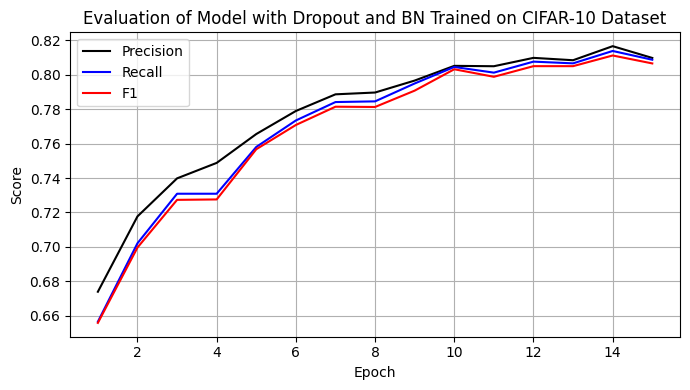

In [ ]:
# Plot loss and accuracy values
plt.figure(figsize=(7, 4))
plt.grid()
plt.plot(range(1, epochs+1), precision_values_test, label='Precision', c='k')
plt.plot(range(1, epochs+1), recall_values_test, label='Recall', c='b')
plt.plot(range(1, epochs+1), f1_values_test, label='F1', c='r')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Evaluation of Model with Dropout and BN Trained on CIFAR-10 Dataset')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate classification report for the rebalanced model
report = classification_report(true_labels, total_predictions, target_names=classes)

# Print classification report
print("Classification Report of Model with Dropout and BN Trained on CIFAR-10 Dataset:\n")
print(report)


Classification Report of Model with Dropout and BN Trained on CIFAR-10 Dataset:

              precision    recall  f1-score   support

    airplane       0.79      0.86      0.83      1000
  automobile       0.91      0.89      0.90      1000
        bird       0.75      0.71      0.73      1000
         cat       0.72      0.56      0.63      1000
        deer       0.78      0.80      0.79      1000
         dog       0.76      0.74      0.75      1000
        frog       0.72      0.93      0.81      1000
       horse       0.85      0.86      0.86      1000
        ship       0.93      0.86      0.89      1000
       truck       0.87      0.89      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

